## GROUP 8 

#### *Members:* 

1. Gianfranco Soria (20163509)
2. Erick Morales (20163041)
3. Andrea Clavo (20176040)
4. Sandra Martínez (20173026)

____
# *QUESTION 1*
____

## Multiconilearity
_____

1. Describe in a markdown cell what is Multicollinearity and present some examples. Use equations to explain your argument.


### What is multicollinearity? 

Multicollinearity -*also collinearity* -is when two or more predictor variables in a multiple regression model are correlated with each other. This latter means that one can be linearly predicted from the others with a substantial degree of accuracy. Linear regression models with many variables often included numerous variables that may be related to each other.


We have perfect multicollinearity if the correlation between two independent variables is equal to $1$ or $−1$, as in the equation: $$X_{2i} = \lambda_0 + \lambda_1X_{1i}$$

.


*Example:*

$$ 
Salary_{i} = \beta_{0} + \beta_{1}(Years.Experience_{i}) + \beta_{2}(Age_{i}) + \epsilon_{i} 
$$ 

+ $ \beta_{1}:$ The marginal effect on salary of $1$ additional year of experience, holding other variables constant.
+ $\beta_{2}:$ The marginal effect on salary of $1$ additional year of age, holding other variables constant.


In this example, we can't really hold age constant while increasing years of experience.


.



One of the main concerns of multicollinearity is that it can lead to coefficients being flipped from the direction we expect from simple linear regression, and that the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Also it undermines the statistical significance of an independent variable.

Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors.

That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.


### Consequences of multicollinearity 

In the presence of multicollinearity, the estimate of one variable's impact on the dependent variable $Y$ while controlling for the others tends to be less precise than if predictors were uncorrelated with one another. The usual interpretation of a regression coefficient is that it provides an estimate of the effect of a one unit change in an independent variable, $X_1$ holding the other variables constant. If $X_1$ is highly correlated with another independent variable, $X_2$, in the given data set, then we have a set of observations for which $X_1$ and $X_2$ have a particular linear stochastic relationship. We don't have a set of observations for which all changes in $X_1$ are independent of changes in $X_2$, so we have an imprecise estimate of the effect of independent changes in $X_1$.

In some sense, the collinear variables contain the same information about the dependent variable. If nominally "different" measures actually quantify the same phenomenon then they are redundant. Alternatively, if the variables are accorded different names and perhaps employ different numeric measurement scales but are highly correlated with each other, then they suffer from redundancy.

One of the features of multicollinearity is that due to multicollinearity, we might get a very high accuracy (or more accurately high $R^2$) but the standard errors for the coefficients happen to be so high that we cannot say with any variable actually contributes to accuracy. In this case, the test of the hypothesis that the coefficient is equal to zero may lead to a failure to reject a false null hypothesis of no effect of the explanator, a type $II$ error. 

Another issue is that a principal danger of such data redundancy is that of overfitting in regression analysis models. The best regression models are those in which the predictor variables each correlate highly with the dependent (outcome) variable but correlate at most only minimally with each other. Such a model is often called "low noise" and will be statistically robust (that is, it will predict reliably across numerous samples of variable sets drawn from the same statistical population).

So long as the underlying specification is correct, multicollinearity does not actually bias results; it just produces large standard errors in the related independent variables. More importantly, the usual use of regression is to take coefficients from the model and then apply them to other data. Since multicollinearity causes imprecise estimates of coefficient values, the resulting out-of-sample predictions will also be imprecise. And if the pattern of multicollinearity in the new data differs from that in the data that was fitted, such extrapolation may introduce large errors in the predictions

Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as "an increase of $1$ in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant". This becomes problematic when multicollinearity is present because we can't hold correlated predictors constant. Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

### How to detect multicollinearity? 

+ Check correlation between all pairs of $X$ variables.
    + Hoping for something close to $0...$
    + One rule of thumb: Problematic once correlation is above $0.9$

+ Create auxiliary regressions for each $X_{i}$ variable, e.g.:
    + $X_1 = \beta_{0} + \beta_{1}(X_2) + \beta_{2}(X_3) + \beta_{3}(X_4) + \epsilon_{1}$
    + Find out how much of the variance of $X$ is explained by the other $X$ variables. How superfluous is $X_1$?
    + Calculate the variance inflation factor for each $X_{i}$ using the $R^2$ from each regression: $$VIF = \frac{1}{1-R^2_k}$$
    + Typical rule of thumb: Above $10$ is problematic. But that is just saying that the R-squared is above $0.9...$
    

+ Can also look at coefficients. If they have a negative sign, but the correlation between the predictor and the outcome variable is positive then that could suggest an issue.



2. Create a 10x10 matrix following the next :
+ 9 vectors (columns) follow a normal distribution.
+ The 10th vector is a linear combination of tree vectors.
+ Feel free to choose any functional form for the linear combination.
+ Try to find the inverse of this matrix and show what is the output you get in both R and Python.
+ Explain why you get different results.

In [5]:
import numpy as np 
import random

In [6]:
v1 = np.random.normal(0,1, 90).reshape((10,9)).round(4)
v2 = (v1[:,1] + v1[:,2] + 3*v1[:,4]).reshape((10,1))

matriz = np.append(v1, v2, axis=1)
matriz_df = pd.DataFrame(data = matriz,
                         index = pd.RangeIndex(range(1, 11)),
                         columns=pd.RangeIndex(range(1, 11)))

matriz_inversa = np.linalg.inv(matriz).round(4)
matriz_inversa_df = pd.DataFrame(data = matriz_inversa,
                         index = pd.RangeIndex(range(1, 11)),
                         columns=pd.RangeIndex(range(1, 11)))
matriz_df

1       2       3       4       5       6       7       8       9   \
1  -0.7730 -0.3464  0.6116  0.8784  0.5925 -0.8652  0.4452  0.7876  0.4497   
2  -0.8693 -1.2284  0.0069 -0.2804 -1.1901  0.5649 -0.0936 -0.4829 -0.4075   
3  -0.3221 -0.0141  1.9352 -2.2314  0.0701  1.2284  0.4749 -2.0712  0.4581   
4  -0.2079  0.9424 -0.5793  0.4418  0.8795  1.1703 -2.0796 -0.1776  0.8435   
5   0.4355  0.2898 -1.3217 -0.9053  1.6037  1.9017  1.0759 -1.2178  1.2880   
6   0.6863 -0.9846  1.2850 -1.2553 -1.1036  1.1147  0.8711  0.9959  0.4140   
7   0.4959  1.1712 -0.7764 -1.0818  0.0572 -0.7508 -0.6598  1.5783  1.0735   
8  -1.7343  2.8391  0.0427  1.5841  2.3411 -0.0068  1.3300 -0.8142  1.0874   
9  -1.0853  1.1587  1.0921 -0.0291 -0.7961 -0.5346 -0.9668 -0.6596 -0.3535   
10 -0.9756 -0.3768  0.9110  0.5837  0.8124 -1.2020  0.6045  1.2647 -0.0105   

        10  
1   2.0427  
2  -4.7918  
3   2.1314  
4   3.0016  
5   3.7792  
6  -3.0104  
7   0.5664  
8   9.9051  
9  -0.1375  
10  2.9714

In [7]:
matriz_inversa_df

1             2             3             4             5   \
1  -7.622200e+00  1.815700e+01  1.080660e+01  7.340500e+00 -5.574160e+01   
2   6.643924e+15 -1.099872e+16 -1.303857e+16 -3.888555e+15  2.495396e+16   
3   6.643924e+15 -1.099872e+16 -1.303857e+16 -3.888555e+15  2.495396e+16   
4  -5.500000e+00  9.877000e+00  1.219900e+01  2.595600e+00 -3.573210e+01   
5   1.993177e+16 -3.299617e+16 -3.911572e+16 -1.166566e+16  7.486188e+16   
6   4.292800e+00 -7.978200e+00 -9.749700e+00 -2.601800e+00  1.843270e+01   
7   8.930000e-01 -1.518700e+00 -1.933500e+00 -8.549000e-01  3.627200e+00   
8   5.408300e+00 -9.811800e+00 -1.190680e+01 -3.358600e+00  2.239810e+01   
9  -6.527700e+00  1.326510e+01  1.581630e+01  4.656000e+00 -2.997370e+01   
10 -6.643924e+15  1.099872e+16  1.303857e+16  3.888555e+15 -2.495396e+16   

              6             7             8             9             10  
1  -9.091100e+00  6.744900e+00  2.002770e+01 -2.982550e+01 -6.930800e+00  
2   4.647576e+15 -7.382039e+15 -1.224991e+16  3.099396e+16  7.623211e+15  
3   4.647576e+15 -7.382039e+15 -1.224991e+16  3.099396e+16  7.623211e+15  
4  -1.652000e+00  5.054600e+00  8.616600e+00 -2.858310e+01 -5.723500e+00  
5   1.394273e+16 -2.214612e+16 -3.674974e+16  9.298187e+16  2.286963e+16  
6   3.779700e+00 -5.631600e+00 -8.881400e+00  2.280480e+01  5.924700e+00  
7   7.948000e-01 -1.065000e+00 -1.576400e+00  4.373900e+00  1.039700e+00  
8   4.451400e+00 -6.551900e+00 -1.093640e+01  2.781050e+01  7.407400e+00  
9  -5.578600e+00  9.137500e+00  1.470080e+01 -3.729070e+01 -1.017080e+01  
10 -4.647576e+15  7.382039e+15  1.224991e+16 -3.099396e+16 -7.623211e+15

Why are the outputs different?
- Since R detected multicollinearity, then it suggests our matrix is singular. Given this, there's no way we can get the determinant of our matrix, then we can't have its inverse. 

____
# *QUESTION 2*
___

##### 1. Replicate the results of the script analyzing_rct_reemployment_experiment both in Python and R. Follow the next instructions:

- Focus on the Treatment group 2
- Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1
- Run all specifications:
    * classical 2-sample approach, no adjustment (CL)
    * classical linear regression adjustment (CRA)
    * interactive regression adjustment (IRA)
    * interactive regression adjustment (IRA) using Lasso. I already fixed the problems in the Python code so please check again the Python script for the solution. For this now I used another package called hdmpy, you can see how to install it in this link. If you don´t want to use this package (which will give you the exact results as it is in R) just use the lasso from scikit-learn.

## Analyzing RCT data with Precision Adjustment

### Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
## loading the data
Penn = pd.read_csv("../data/penn_jae.dat" , sep='\s', engine='python')
Penn.head()

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace  dep  q1  \
0  10824   0        18        18       0      0         0        0    2   0   
1  10635   2         7         3       0      0         0        0    0   0   
2  10551   5        18         6       1      0         0        0    0   0   
3  10824   0         1         1       0      0         0        0    0   0   
4  10747   0        27        27       0      0         0        0    0   0   

   ...  q5  q6  recall  agelt35  agegt54  durable  nondurable  lusd  husd  \
0  ...   0   0       0        0        0        0           0     1     0   
1  ...   0   0       1        0        0        0           1     0     0   
2  ...   0   1       0        1        0        0           0     0     0   
3  ...   0   0       0        0        0        0           1     0     0   
4  ...   0   0       0        0        0        0           1     0     0   

   muld  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 24 columns]

In [10]:
n = Penn.shape[0]
n

13913

In [11]:
p_1 = Penn.shape[1]
p_1

24

- Focus on the Treatment group 2

In [12]:
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]
Penn.shape

(5782, 24)

In [13]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [14]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

In [33]:
Penn['T2'].value_counts()

0    3354
1    2428
Name: T2, dtype: int64

In [15]:
Penn.head(10)

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace  dep  q1  \
0   10824   0        18        18       0      0         0        0    2   0   
1   10635   2         7         3       0      0         0        0    0   0   
3   10824   0         1         1       0      0         0        0    0   0   
4   10747   0        27        27       0      0         0        0    0   0   
9   10754   2        20        20       1      0         0        0    0   0   
12  10831   0        27        27       0      0         0        0    1   0   
13  10845   0        27        27       1      0         0        0    0   0   
14  10831   0         9         9       1      0         0        0    1   0   
16  10859   0        27        27       1      0         0        0    1   0   
21  10628   2        27        27       0      0         0        0    0   0   

    ...  q6  recall  agelt35  agegt54  durable  nondurable  lusd  husd  muld  \
0   ...   0       0        0        0        0           0     1     0   NaN   
1   ...   0       1        0        0        0           1     0     0   NaN   
3   ...   0       0        0        0        0           1     0     0   NaN   
4   ...   0       0        0        0        0           1     0     0   NaN   
9   ...   0       0        0        0        0           0     0     1   NaN   
12  ...   0       0        1        1        0           1     0     0   NaN   
13  ...   0       0        1        0        0           1     0     0   NaN   
14  ...   0       0        1        0        0           1     0     0   NaN   
16  ...   0       0        0        0        0           1     0     0   NaN   
21  ...   0       0        0        0        0           0     0     1   NaN   

    T2  
0    0  
1    1  
3    0  
4    0  
9    1  
12   0  
13   0  
14   0  
16   0  
21   1  

[10 rows x 25 columns]

In [16]:
# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace dep  q1  \
0  10824   0        18        18       0      0         0        0   2   0   
1  10635   2         7         3       0      0         0        0   0   0   
3  10824   0         1         1       0      0         0        0   0   0   
4  10747   0        27        27       0      0         0        0   0   0   
9  10754   2        20        20       1      0         0        0   0   0   

   ...  q6  recall  agelt35  agegt54  durable  nondurable  lusd  husd  muld  \
0  ...   0       0        0        0        0           0     1     0   NaN   
1  ...   0       1        0        0        0           1     0     0   NaN   
3  ...   0       0        0        0        0           1     0     0   NaN   
4  ...   0       0        0        0        0           1     0     0   NaN   
9  ...   0       0        0        0        0           0     0     1   NaN   

   T2  
0   0  
1   1  
3   0  
4   0  
9   1  

[5 rows x 25 columns]

- Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

In [17]:
#pip install altair

Note: you may need to restart the kernel to use updated packages.


El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos.


In [18]:
import altair as alt

In [19]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [31]:
alt.Chart(Penn).mark_bar().encode(
    x = alt.X('inuidur1:Q', title = "Length (in weeks) of the first spell of unemployment", bin=False),
    y = 'count():Q',
    color = 'T2',
    tooltip = ['T2',"count()"],
).interactive().properties(width=800, height=450).properties(
    title = {
      "text": ["HISTOGRAM"], 
      "subtitle": ["Frenquency",
                   "Control and Treatment groups"],
      "color": "Black",
      "subtitleColor": "Blue"
    })

alt.Chart(...)

In [21]:
alt.Chart(Penn[Penn['T2'] == 1]).mark_bar().encode(
    alt.X('inuidur1:Q', title = "Length (in weeks) of the first spell of unemployment", bin=False),
    y = 'count():Q',
    tooltip = ["count()"],
).interactive().properties(width=800, height=350).properties(
    title = {
      "text": ["HISTOGRAM"], 
      "subtitle": ["Frenquency",
                  "Treatment group"],
      "color": "Black",
      "subtitleColor": "Blue"
    })

alt.Chart(...)

In [22]:
alt.Chart(Penn[Penn['T2'] == 0]).mark_bar().encode(
    alt.X('inuidur1:Q', title = "Length (in weeks) of the first spell of unemployment", bin=False),
    y = 'count():Q',
    tooltip = ["count()"],
).interactive().properties(width=800, height=350).properties(
    title = {
      "text": ["HISTOGRAM"], 
      "subtitle": ["Frenquency",
                  "Control group"],
      "color": "Black",
      "subtitleColor": "Blue"
    })

alt.Chart(...)

- Run all specifications:
    * classical 2-sample approach, no adjustment (CL)
    * classical linear regression adjustment (CRA)
    * interactive regression adjustment (IRA)
    * interactive regression adjustment (IRA) using Lasso

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

## Regress treatment on all covariates

In [76]:
model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
model_results = smf.ols(model , data=Penn).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:", len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.748
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           5.79e-51
Time:                        16:30:19   Log-Likelihood:                -4065.8
No. Observations:                5782   AIC:                             8352.
Df Residuals:                    5672   BIC:                             9084.
Df Model:                         109                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5090    

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 119, but rank is 108
  'rank is %d' % (J, J_), ValueWarning)


In this case it can be observed that unlike the R model, here the covariates that can cause multicollinearity are given a value of almost 0 compared to R, which simply does not identify them (NA)

## Regress treatment on specific covariates

In [77]:
# 2. But we need to carry out about colinear variables 
# To make similar as R notebook, lets delete the variables lm package also deleted
y, X = patsy.dmatrices(model, Penn, return_type='dataframe')

In [78]:
len( list( X.columns.values ) )

120

Since Python operates differently from R, and in this case we want the covariates that cause multicollinearity to be eliminated, with the information from R we eliminate those columns. 

In [79]:
# Variables deleted by lm package in R. 
no_columns = ['black:othrace','black:q6', 'othrace:q6','q2:q3', 'q2:q4','q2:q5','q2:q6', 'q3:q4', 'q3:q5',  'q3:q6', 'q4:q5', 'q4:q6','q5:q6','q6:lusd', 'q6:husd' , 'agelt35:agegt54' , 'lusd:husd']
len(no_columns)

17

In [80]:
# New covariates matrix
X_new = X.drop(no_columns, axis = 1 )
X_new

Intercept  C(dep)[T.1]  C(dep)[T.2]  female  female:C(dep)[T.1]  \
0            1.0          0.0          1.0     0.0                 0.0   
1            1.0          0.0          0.0     0.0                 0.0   
3            1.0          0.0          0.0     0.0                 0.0   
4            1.0          0.0          0.0     0.0                 0.0   
9            1.0          0.0          0.0     1.0                 0.0   
...          ...          ...          ...     ...                 ...   
13900        1.0          0.0          1.0     1.0                 0.0   
13901        1.0          0.0          0.0     0.0                 0.0   
13906        1.0          0.0          1.0     0.0                 0.0   
13909        1.0          0.0          0.0     1.0                 0.0   
13911        1.0          0.0          0.0     0.0                 0.0   

       female:C(dep)[T.2]  black  black:C(dep)[T.1]  black:C(dep)[T.2]  \
0                     0.0    0.0                0.0                0.0   
1                     0.0    0.0                0.0                0.0   
3                     0.0    0.0                0.0                0.0   
4                     0.0    0.0                0.0                0.0   
9                     0.0    0.0                0.0                0.0   
...                   ...    ...                ...                ...   
13900                 1.0    0.0                0.0                0.0   
13901                 0.0    1.0                0.0                0.0   
13906                 0.0    0.0                0.0                0.0   
13909                 0.0    0.0                0.0                0.0   
13911                 0.0    0.0                0.0                0.0   

       othrace  ...  q6:agegt54  q6:durable  agelt35:durable  agelt35:lusd  \
0          0.0  ...         0.0         0.0              0.0           0.0   
1          0.0  ...         0.0         0.0              0.0           0.0   
3          0.0  ...         0.0         0.0              0.0           0.0   
4          0.0  ...         0.0         0.0              0.0           0.0   
9          0.0  ...         0.0         0.0              0.0           0.0   
...        ...  ...         ...         ...              ...           ...   
13900      1.0  ...         0.0         0.0              0.0           0.0   
13901      0.0  ...         0.0         0.0              0.0           0.0   
13906      0.0  ...         0.0         0.0              0.0           0.0   
13909      0.0  ...         0.0         0.0              0.0           0.0   
13911      0.0  ...         0.0         0.0              0.0           0.0   

       agelt35:husd  agegt54:durable  agegt54:lusd  agegt54:husd  \
0               0.0              0.0           0.0           0.0   
1               0.0              0.0           0.0           0.0   
3               0.0              0.0           0.0           0.0   
4               0.0              0.0           0.0           0.0   
9               0.0              0.0           0.0           0.0   
...             ...              ...           ...           ...   
13900           0.0              0.0           0.0           0.0   
13901           0.0              0.0           0.0           1.0   
13906           0.0              0.0           0.0           0.0   
13909           0.0              0.0           0.0           0.0   
13911           0.0              0.0           0.0           0.0   

       durable:lusd  durable:husd  
0               0.0           0.0  
1               0.0           0.0  
3               0.0           0.0  
4               0.0           0.0  
9               0.0           0.0  
...             ...           ...  
13900           0.0           1.0  
13901           0.0           0.0  
13906           0.0           0.0  
13909           0.0           0.0  
13911           0.0           0.0  

[5782 rows x 103 columns]

In [81]:
# Results 
model_results_2 = sm.OLS( y, X_new ).fit().get_robustcov_results(cov_type = "HC1")
print(model_results_2.summary())
print( "Number of regressors in the basic model:",len(results_2.params), '\n')


                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     5.007
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.06e-51
Time:                        16:30:25   Log-Likelihood:                -4071.1
No. Observations:                5782   AIC:                             8346.
Df Residuals:                    5680   BIC:                             9026.
Df Model:                         101                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5099    

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 100
  'rank is %d' % (J, J_), ValueWarning)


NameError: name 'results_2' is not defined

We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification

- classical 2-sample approach, no adjustment (CL)
- classical linear regression adjustment (CRA)

In [159]:
import numpy as np

In [160]:
Penn.head()

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace dep  q1  \
0  10824   0        18        18       0      0         0        0   2   0   
1  10635   2         7         3       0      0         0        0   0   0   
3  10824   0         1         1       0      0         0        0   0   0   
4  10747   0        27        27       0      0         0        0   0   0   
9  10754   2        20        20       1      0         0        0   0   0   

   ...  recall  agelt35  agegt54  durable  nondurable  lusd  husd  muld  T2  \
0  ...       0        0        0        0           0     1     0   NaN   0   
1  ...       1        0        0        0           1     0     0   NaN   1   
3  ...       0        0        0        0           1     0     0   NaN   0   
4  ...       0        0        0        0           1     0     0   NaN   0   
9  ...       0        0        0        0           0     0     1   NaN   1   

   log_inuidur1  
0      2.890372  
1      1.945910  
3      0.000000  
4      3.295837  
9      2.995732  

[5 rows x 26 columns]

In [161]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")
ols_cra = smf.ols( formula = formula_cra, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0154
Time:                        17:20:49   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 120, but rank is 109
  'rank is %d' % (J, J_), ValueWarning)


In [162]:
ols_cl_model = ols_cl.get_robustcov_results(cov_type = "HC1").summary2().tables[1].round(3)
ols_cra_model = ols_cra.get_robustcov_results(cov_type = "HC1").summary2().tables[1].round(3)

print(ols_cl_model)
print(ols_cra_model)

           Coef.  Std.Err.       t  P>|t|  [0.025  0.975]
Intercept  2.057     0.021  98.158  0.000   2.016   2.098
T2        -0.079     0.033  -2.425  0.015  -0.143  -0.015
              Coef.  Std.Err.       t  P>|t|  [0.025  0.975]
Intercept     1.701     0.081  21.063  0.000   1.542   1.859
dep[T.1]      0.162     0.142   1.140  0.254  -0.116   0.440
dep[T.2]      0.023     0.123   0.188  0.851  -0.219   0.265
T2           -0.069     0.032  -2.152  0.031  -0.132  -0.006
female        0.142     0.089   1.602  0.109  -0.032   0.315
...             ...       ...     ...    ...     ...     ...
agegt54:lusd -0.029     0.124  -0.236  0.813  -0.273   0.214
agegt54:husd -0.267     0.103  -2.596  0.009  -0.469  -0.065
durable:lusd -0.321     0.132  -2.430  0.015  -0.579  -0.062
durable:husd -0.042     0.127  -0.332  0.740  -0.291   0.207
lusd:husd     0.000     0.000     NaN    NaN   0.000   0.000

[121 rows x 6 columns]


C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 120, but rank is 109
  'rank is %d' % (J, J_), ValueWarning)


The interactive specificaiton corresponds to the approach introduced in Lin (2013).

- Interactive regression adjustment (IRA)

### Without deleting correlated variables

In [163]:
# No intercept
formula3 = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd) ** 2"

# Create dependent variable and drop the intercept
y, X = patsy.dmatrices(formula3, Penn, return_type='dataframe')

In [164]:
#Drop intercep
X = X.drop( 'Intercept', axis = 1)

# demean variables 
def demean(X):
    output = X - np.mean(X)
    return output

X = X.apply( demean , axis = 0 )
X

C(dep)[T.1]  C(dep)[T.2]    female  female:C(dep)[T.1]  \
0        -0.116569     0.839329 -0.400726           -0.050156   
1        -0.116569    -0.160671 -0.400726           -0.050156   
3        -0.116569    -0.160671 -0.400726           -0.050156   
4        -0.116569    -0.160671 -0.400726           -0.050156   
9        -0.116569    -0.160671  0.599274           -0.050156   
...            ...          ...       ...                 ...   
13900    -0.116569     0.839329  0.599274           -0.050156   
13901    -0.116569    -0.160671 -0.400726           -0.050156   
13906    -0.116569     0.839329 -0.400726           -0.050156   
13909    -0.116569    -0.160671  0.599274           -0.050156   
13911    -0.116569    -0.160671 -0.400726           -0.050156   

       female:C(dep)[T.2]     black  black:C(dep)[T.1]  black:C(dep)[T.2]  \
0               -0.051193 -0.118817          -0.014355          -0.015047   
1               -0.051193 -0.118817          -0.014355          -0.015047   
3               -0.051193 -0.118817          -0.014355          -0.015047   
4               -0.051193 -0.118817          -0.014355          -0.015047   
9               -0.051193 -0.118817          -0.014355          -0.015047   
...                   ...       ...                ...                ...   
13900            0.948807 -0.118817          -0.014355          -0.015047   
13901           -0.051193  0.881183          -0.014355          -0.015047   
13906           -0.051193 -0.118817          -0.014355          -0.015047   
13909           -0.051193 -0.118817          -0.014355          -0.015047   
13911           -0.051193 -0.118817          -0.014355          -0.015047   

        othrace  othrace:C(dep)[T.1]  ...  agelt35:agegt54  agelt35:durable  \
0     -0.005189            -0.000692  ...        -0.018852         -0.01522   
1     -0.005189            -0.000692  ...        -0.018852         -0.01522   
3     -0.005189            -0.000692  ...        -0.018852         -0.01522   
4     -0.005189            -0.000692  ...        -0.018852         -0.01522   
9     -0.005189            -0.000692  ...        -0.018852         -0.01522   
...         ...                  ...  ...              ...              ...   
13900  0.994811            -0.000692  ...        -0.018852         -0.01522   
13901 -0.005189            -0.000692  ...        -0.018852         -0.01522   
13906 -0.005189            -0.000692  ...        -0.018852         -0.01522   
13909 -0.005189            -0.000692  ...        -0.018852         -0.01522   
13911 -0.005189            -0.000692  ...         0.981148         -0.01522   

       agelt35:lusd  agelt35:husd  agegt54:durable  agegt54:lusd  \
0         -0.027672     -0.038568              0.0     -0.029056   
1         -0.027672     -0.038568              0.0     -0.029056   
3         -0.027672     -0.038568              0.0     -0.029056   
4         -0.027672     -0.038568              0.0     -0.029056   
9         -0.027672     -0.038568              0.0     -0.029056   
...             ...           ...              ...           ...   
13900     -0.027672     -0.038568              0.0     -0.029056   
13901     -0.027672     -0.038568              0.0     -0.029056   
13906     -0.027672     -0.038568              0.0     -0.029056   
13909     -0.027672     -0.038568              0.0     -0.029056   
13911     -0.027672     -0.038568              0.0     -0.029056   

       agegt54:husd  durable:lusd  durable:husd  lusd:husd  
0         -0.054134     -0.033898     -0.040125        0.0  
1         -0.054134     -0.033898     -0.040125        0.0  
3         -0.054134     -0.033898     -0.040125        0.0  
4         -0.054134     -0.033898     -0.040125        0.0  
9         -0.054134     -0.033898     -0.040125        0.0  
...             ...           ...           ...        ...  
13900     -0.054134     -0.033898      0.959875        0.0  
13901      0.945866     -0.033898     -0.040125

In [165]:
np.mean(X["female"]) #This means that is correct because is almost 0. 

-1.153858130530737e-15

In [166]:
# create Y variable 
log_inuidur1 = np.log( Penn["inuidur1"] )

In [167]:
# Rename X columns (Cleaning)
columns = X.columns.to_list()
new_columns = []
for column in columns:
    new_string = column.replace(".", "_")
    new_string = new_string.replace("C(dep)", "C_dep")
    new_string = new_string.replace("[", "_")
    new_string = new_string.replace("]", "")
    new_columns.append(new_string)
X.columns = new_columns

In [168]:
# Function to create name of the model 
def listToString(s):  
    i = 1
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:
        if i ==1:
            str1 = ele
            i += 1
        else:
            str1 += " + " + ele   
    
    # return string   
    return str1

In [169]:
covars = listToString(X.columns.to_list())
len(X.columns.to_list())

119

In [170]:
covars

'C_dep_T_1 + C_dep_T_2 + female + female:C_dep_T_1 + female:C_dep_T_2 + black + black:C_dep_T_1 + black:C_dep_T_2 + othrace + othrace:C_dep_T_1 + othrace:C_dep_T_2 + q2 + C_dep_T_1:q2 + C_dep_T_2:q2 + q3 + C_dep_T_1:q3 + C_dep_T_2:q3 + q4 + C_dep_T_1:q4 + C_dep_T_2:q4 + q5 + C_dep_T_1:q5 + C_dep_T_2:q5 + q6 + C_dep_T_1:q6 + C_dep_T_2:q6 + agelt35 + C_dep_T_1:agelt35 + C_dep_T_2:agelt35 + agegt54 + C_dep_T_1:agegt54 + C_dep_T_2:agegt54 + durable + C_dep_T_1:durable + C_dep_T_2:durable + lusd + C_dep_T_1:lusd + C_dep_T_2:lusd + husd + C_dep_T_1:husd + C_dep_T_2:husd + female:black + female:othrace + female:q2 + female:q3 + female:q4 + female:q5 + female:q6 + female:agelt35 + female:agegt54 + female:durable + female:lusd + female:husd + black:othrace + black:q2 + black:q3 + black:q4 + black:q5 + black:q6 + black:agelt35 + black:agegt54 + black:durable + black:lusd + black:husd + othrace:q2 + othrace:q3 + othrace:q4 + othrace:q5 + othrace:q6 + othrace:agelt35 + othrace:agegt54 + othrace:du

In [171]:
# Creating the covariable T2*X
X['T2'] = y
X.shape

(5782, 120)

In [172]:
formula4 = f"T2 ~ T2*({covars})"

In [173]:
y, X_T2 = patsy.dmatrices(formula4, X, return_type='dataframe')
X_T2

Intercept   T2  C_dep_T_1  C_dep_T_2    female  female:C_dep_T_1  \
0            1.0  0.0  -0.116569   0.839329 -0.400726          0.046712   
1            1.0  1.0  -0.116569  -0.160671 -0.400726          0.046712   
3            1.0  0.0  -0.116569  -0.160671 -0.400726          0.046712   
4            1.0  0.0  -0.116569  -0.160671 -0.400726          0.046712   
9            1.0  1.0  -0.116569  -0.160671  0.599274         -0.069857   
...          ...  ...        ...        ...       ...               ...   
13900        1.0  0.0  -0.116569   0.839329  0.599274         -0.069857   
13901        1.0  1.0  -0.116569  -0.160671 -0.400726          0.046712   
13906        1.0  0.0  -0.116569   0.839329 -0.400726          0.046712   
13909        1.0  1.0  -0.116569  -0.160671  0.599274         -0.069857   
13911        1.0  0.0  -0.116569  -0.160671 -0.400726          0.046712   

       female:C_dep_T_2     black  black:C_dep_T_1  black:C_dep_T_2  ...  \
0             -0.336341 -0.118817         0.013850        -0.099727  ...   
1              0.064385 -0.118817         0.013850         0.019090  ...   
3              0.064385 -0.118817         0.013850         0.019090  ...   
4              0.064385 -0.118817         0.013850         0.019090  ...   
9             -0.096286 -0.118817         0.013850         0.019090  ...   
...                 ...       ...              ...              ...  ...   
13900          0.502988 -0.118817         0.013850        -0.099727  ...   
13901          0.064385  0.881183        -0.102718        -0.141581  ...   
13906         -0.336341 -0.118817         0.013850        -0.099727  ...   
13909         -0.096286 -0.118817         0.013850         0.019090  ...   
13911          0.064385 -0.118817         0.013850         0.019090  ...   

       T2:agelt35:agegt54  T2:agelt35:durable  T2:agelt35:lusd  \
0                0.000000            0.000000        -0.000000   
1                0.015861            0.011570         0.023543   
3                0.000000            0.000000         0.000000   
4                0.000000            0.000000         0.000000   
9                0.015861            0.011570         0.023543   
...                   ...                 ...              ...   
13900            0.000000           -0.000000         0.000000   
13901           -0.090158            0.011570         0.023543   
13906            0.000000            0.000000         0.000000   
13909           -0.133742           -0.097562        -0.198525   
13911            0.000000           -0.000000        -0.000000   

       T2:agelt35:husd  T2:agegt54:durable  T2:agegt54:lusd  T2:agegt54:husd  \
0             0.000000            0.000000        -0.000000         0.000000   
1             0.046683            0.016326         0.033222         0.065875   
3             0.000000            0.000000         0.000000         0.000000   
4             0.000000            0.000000         0.000000         0.000000   
9            -0.059335            0.016326         0.033222        -0.083728   
...                ...                 ...              ...              ...   
13900        -0.000000           -0.000000         0.000000        -0.000000   
13901        -0.059335           -0.092805        -0.188847         0.475940   
13906         0.000000            0.000000         0.000000         0.000000   
13909        -0.393649            0.016326         0.033222         0.065875   
13911        -0.000000           -0.000000        -0.000000        -0.000000   

       T2:durable:lusd  T2:durable:husd  T2:lusd:husd  
0            -0.000000         0.000000     -0.000000  
1             0.024235         0.048054      0.097784  
3             0.000000         0.000000      0.000000  
4             0.000000         0.000000      0.000000  
9             0.024235        -0.061078     -0.124285  
...                ...              ...           ...  
13900        -0.000000         0.000000     -0.

In [174]:
# Reset index to estimation
log_inuidur1 = np.log(Penn[ 'inuidur1' ])
ols_ira = sm.OLS( log_inuidur1, X_T2 ).fit().get_robustcov_results(cov_type = "HC1")
# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.326
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          6.67e-169
Time:                        17:21:06   Log-Likelihood:                -9105.1
No. Observations:                5782   AIC:                         1.864e+04
Df Residuals:                    5566   BIC:                         2.008e+04
Df Model:                         215                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.0445 

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 239, but rank is 206
  'rank is %d' % (J, J_), ValueWarning)


#OjO: El coeficiente de T2 es distinto el Pyhton al de R porque lo que se declaró como multicolineal, Python puede no tomarlo igual a R. Por eso se borra utilziando R. 

In [175]:
ols_ira_est = ols_ira.get_robustcov_results(cov_type = "HC1").summary2().tables[1].round(4)
print( ols_ira_est )

                  Coef.  Std.Err.        t   P>|t|  [0.025  0.975]
Intercept        2.0445    0.0279  73.3215  0.0000  1.9899  2.0992
T2              -0.0857    0.0409  -2.0975  0.0360 -0.1658 -0.0056
C_dep_T_1        0.1547    0.0681   2.2697  0.0233  0.0211  0.2883
C_dep_T_2        0.1442    0.0709   2.0319  0.0422  0.0051  0.2832
female           0.1198    0.0439   2.7265  0.0064  0.0337  0.2059
...                 ...       ...      ...     ...     ...     ...
T2:agegt54:lusd -0.1965    0.2553  -0.7698  0.4415 -0.6969  0.3039
T2:agegt54:husd -0.3084    0.2118  -1.4559  0.1455 -0.7236  0.1068
T2:durable:lusd  0.0748    0.2725   0.2744  0.7838 -0.4595  0.6090
T2:durable:husd -0.4114    0.2621  -1.5698  0.1165 -0.9253  0.1024
T2:lusd:husd     0.0105    0.0565   0.1851  0.8532 -0.1003  0.1212

[240 rows x 6 columns]


C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 239, but rank is 206
  'rank is %d' % (J, J_), ValueWarning)


### Lets try the same regression by dropping the possible correlated variables (IRA)

In [176]:
# Variables deleted by lm package in R .
no_columns = ['black:othrace','black:q6', 'othrace:q6','q2:q3', 'q2:q4','q2:q5','q2:q6', 'q3:q4', 'q3:q5',  'q3:q6', 'q4:q5', 'q4:q6','q5:q6','q6:lusd', 'q6:husd' , 'agelt35:agegt54' , 'lusd:husd']

In [177]:
# New covariates matrix. We delete all the columns that create multicollinearity problems. 
X_new = X.drop(no_columns, axis = 1 )
X_new

C_dep_T_1  C_dep_T_2    female  female:C_dep_T_1  female:C_dep_T_2  \
0      -0.116569   0.839329 -0.400726         -0.050156         -0.051193   
1      -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
3      -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
4      -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
9      -0.116569  -0.160671  0.599274         -0.050156         -0.051193   
...          ...        ...       ...               ...               ...   
13900  -0.116569   0.839329  0.599274         -0.050156          0.948807   
13901  -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
13906  -0.116569   0.839329 -0.400726         -0.050156         -0.051193   
13909  -0.116569  -0.160671  0.599274         -0.050156         -0.051193   
13911  -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   

          black  black:C_dep_T_1  black:C_dep_T_2   othrace  \
0     -0.118817        -0.014355        -0.015047 -0.005189   
1     -0.118817        -0.014355        -0.015047 -0.005189   
3     -0.118817        -0.014355        -0.015047 -0.005189   
4     -0.118817        -0.014355        -0.015047 -0.005189   
9     -0.118817        -0.014355        -0.015047 -0.005189   
...         ...              ...              ...       ...   
13900 -0.118817        -0.014355        -0.015047  0.994811   
13901  0.881183        -0.014355        -0.015047 -0.005189   
13906 -0.118817        -0.014355        -0.015047 -0.005189   
13909 -0.118817        -0.014355        -0.015047 -0.005189   
13911 -0.118817        -0.014355        -0.015047 -0.005189   

       othrace:C_dep_T_1  ...  q6:durable  agelt35:durable  agelt35:lusd  \
0              -0.000692  ...   -0.010723         -0.01522     -0.027672   
1              -0.000692  ...   -0.010723         -0.01522     -0.027672   
3              -0.000692  ...   -0.010723         -0.01522     -0.027672   
4              -0.000692  ...   -0.010723         -0.01522     -0.027672   
9              -0.000692  ...   -0.010723         -0.01522     -0.027672   
...                  ...  ...         ...              ...           ...   
13900          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13901          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13906          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13909          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13911          -0.000692  ...   -0.010723         -0.01522     -0.027672   

       agelt35:husd  agegt54:durable  agegt54:lusd  agegt54:husd  \
0         -0.038568              0.0     -0.029056     -0.054134   
1         -0.038568              0.0     -0.029056     -0.054134   
3         -0.038568              0.0     -0.029056     -0.054134   
4         -0.038568              0.0     -0.029056     -0.054134   
9         -0.038568              0.0     -0.029056     -0.054134   
...             ...              ...           ...           ...   
13900     -0.038568              0.0     -0.029056     -0.054134   
13901     -0.038568              0.0     -0.029056      0.945866   
13906     -0.038568              0.0     -0.029056     -0.054134   
13909     -0.038568              0.0     -0.029056     -0.054134   
13911     -0.038568              0.0     -0.029056     -0.054134   

       durable:lusd  durable:husd   T2  
0         -0.033898     -0.040125  0.0  
1         -0.033898     -0.040125  1.0  
3         -0.033898     -0.040125  0.0  
4         -0.033898     -0.040125  0.0  
9         -0.033898     -0.040125  1.0  
...             ...           ...  ...  
13900     -0.033898      0.959875  0.0  
13901     -0.033898     -0.040125  1.0  
13906     -0.033898     -0.040125  0.0  
13909     -0.033898     -0.040125  1.0  
13911     -0.033898     -0.040125  0.0  

[5782 rows x 103 columns]

In [178]:
covars = listToString(X_new.columns.to_list())
len(X_new.columns.to_list())

103

In [179]:
X_new['T2'] = y
X_new.shape
X_new

C_dep_T_1  C_dep_T_2    female  female:C_dep_T_1  female:C_dep_T_2  \
0      -0.116569   0.839329 -0.400726         -0.050156         -0.051193   
1      -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
3      -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
4      -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
9      -0.116569  -0.160671  0.599274         -0.050156         -0.051193   
...          ...        ...       ...               ...               ...   
13900  -0.116569   0.839329  0.599274         -0.050156          0.948807   
13901  -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   
13906  -0.116569   0.839329 -0.400726         -0.050156         -0.051193   
13909  -0.116569  -0.160671  0.599274         -0.050156         -0.051193   
13911  -0.116569  -0.160671 -0.400726         -0.050156         -0.051193   

          black  black:C_dep_T_1  black:C_dep_T_2   othrace  \
0     -0.118817        -0.014355        -0.015047 -0.005189   
1     -0.118817        -0.014355        -0.015047 -0.005189   
3     -0.118817        -0.014355        -0.015047 -0.005189   
4     -0.118817        -0.014355        -0.015047 -0.005189   
9     -0.118817        -0.014355        -0.015047 -0.005189   
...         ...              ...              ...       ...   
13900 -0.118817        -0.014355        -0.015047  0.994811   
13901  0.881183        -0.014355        -0.015047 -0.005189   
13906 -0.118817        -0.014355        -0.015047 -0.005189   
13909 -0.118817        -0.014355        -0.015047 -0.005189   
13911 -0.118817        -0.014355        -0.015047 -0.005189   

       othrace:C_dep_T_1  ...  q6:durable  agelt35:durable  agelt35:lusd  \
0              -0.000692  ...   -0.010723         -0.01522     -0.027672   
1              -0.000692  ...   -0.010723         -0.01522     -0.027672   
3              -0.000692  ...   -0.010723         -0.01522     -0.027672   
4              -0.000692  ...   -0.010723         -0.01522     -0.027672   
9              -0.000692  ...   -0.010723         -0.01522     -0.027672   
...                  ...  ...         ...              ...           ...   
13900          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13901          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13906          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13909          -0.000692  ...   -0.010723         -0.01522     -0.027672   
13911          -0.000692  ...   -0.010723         -0.01522     -0.027672   

       agelt35:husd  agegt54:durable  agegt54:lusd  agegt54:husd  \
0         -0.038568              0.0     -0.029056     -0.054134   
1         -0.038568              0.0     -0.029056     -0.054134   
3         -0.038568              0.0     -0.029056     -0.054134   
4         -0.038568              0.0     -0.029056     -0.054134   
9         -0.038568              0.0     -0.029056     -0.054134   
...             ...              ...           ...           ...   
13900     -0.038568              0.0     -0.029056     -0.054134   
13901     -0.038568              0.0     -0.029056      0.945866   
13906     -0.038568              0.0     -0.029056     -0.054134   
13909     -0.038568              0.0     -0.029056     -0.054134   
13911     -0.038568              0.0     -0.029056     -0.054134   

       durable:lusd  durable:husd   T2  
0         -0.033898     -0.040125  0.0  
1         -0.033898     -0.040125  1.0  
3         -0.033898     -0.040125  0.0  
4         -0.033898     -0.040125  0.0  
9         -0.033898     -0.040125  1.0  
...             ...           ...  ...  
13900     -0.033898      0.959875  0.0  
13901     -0.033898     -0.040125  1.0  
13906     -0.033898     -0.040125  0.0  
13909     -0.033898     -0.040125  1.0  
13911     -0.033898     -0.040125  0.0  

[5782 rows x 103 columns]

In [180]:
formula4 = f"T2 ~ T2*({covars})"
y, X_new_T2 = patsy.dmatrices(formula4, X_new, return_type='dataframe')

# Reset index to estimation
ols_ira = sm.OLS( log_inuidur1, X_new_T2 ).fit().get_robustcov_results(cov_type = "HC1")
# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.654
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          4.17e-167
Time:                        17:21:12   Log-Likelihood:                -9108.2
No. Observations:                5782   AIC:                         1.862e+04
Df Residuals:                    5582   BIC:                         1.995e+04
Df Model:                         199                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.0861 

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 205, but rank is 190
  'rank is %d' % (J, J_), ValueWarning)


It significantly changes the intercept and coefficients of all variables. 

# Next we try out partialling out with lasso

In [181]:
T2 = X_T2[ 'T2' ]
X = X_T2.drop( 'T2', axis = 1)
X = X.drop( 'Intercept', axis = 1)
X

C_dep_T_1  C_dep_T_2    female  female:C_dep_T_1  female:C_dep_T_2  \
0      -0.116569   0.839329 -0.400726          0.046712         -0.336341   
1      -0.116569  -0.160671 -0.400726          0.046712          0.064385   
3      -0.116569  -0.160671 -0.400726          0.046712          0.064385   
4      -0.116569  -0.160671 -0.400726          0.046712          0.064385   
9      -0.116569  -0.160671  0.599274         -0.069857         -0.096286   
...          ...        ...       ...               ...               ...   
13900  -0.116569   0.839329  0.599274         -0.069857          0.502988   
13901  -0.116569  -0.160671 -0.400726          0.046712          0.064385   
13906  -0.116569   0.839329 -0.400726          0.046712         -0.336341   
13909  -0.116569  -0.160671  0.599274         -0.069857         -0.096286   
13911  -0.116569  -0.160671 -0.400726          0.046712          0.064385   

          black  black:C_dep_T_1  black:C_dep_T_2   othrace  \
0     -0.118817         0.013850        -0.099727 -0.005189   
1     -0.118817         0.013850         0.019090 -0.005189   
3     -0.118817         0.013850         0.019090 -0.005189   
4     -0.118817         0.013850         0.019090 -0.005189   
9     -0.118817         0.013850         0.019090 -0.005189   
...         ...              ...              ...       ...   
13900 -0.118817         0.013850        -0.099727  0.994811   
13901  0.881183        -0.102718        -0.141581 -0.005189   
13906 -0.118817         0.013850        -0.099727 -0.005189   
13909 -0.118817         0.013850         0.019090 -0.005189   
13911 -0.118817         0.013850         0.019090 -0.005189   

       othrace:C_dep_T_1  ...  T2:agelt35:agegt54  T2:agelt35:durable  \
0               0.000605  ...            0.000000            0.000000   
1               0.000605  ...            0.015861            0.011570   
3               0.000605  ...            0.000000            0.000000   
4               0.000605  ...            0.000000            0.000000   
9               0.000605  ...            0.015861            0.011570   
...                  ...  ...                 ...                 ...   
13900          -0.115964  ...            0.000000           -0.000000   
13901           0.000605  ...           -0.090158            0.011570   
13906           0.000605  ...            0.000000            0.000000   
13909           0.000605  ...           -0.133742           -0.097562   
13911           0.000605  ...            0.000000           -0.000000   

       T2:agelt35:lusd  T2:agelt35:husd  T2:agegt54:durable  T2:agegt54:lusd  \
0            -0.000000         0.000000            0.000000        -0.000000   
1             0.023543         0.046683            0.016326         0.033222   
3             0.000000         0.000000            0.000000         0.000000   
4             0.000000         0.000000            0.000000         0.000000   
9             0.023543        -0.059335            0.016326         0.033222   
...                ...              ...                 ...              ...   
13900         0.000000        -0.000000           -0.000000         0.000000   
13901         0.023543        -0.059335           -0.092805        -0.188847   
13906         0.000000         0.000000            0.000000         0.000000   
13909        -0.198525        -0.393649            0.016326         0.033222   
13911        -0.000000        -0.000000           -0.000000        -0.000000   

       T2:agegt54:husd  T2:durable:lusd  T2:durable:husd  T2:lusd:husd  
0             0.000000        -0.000000         0.000000     -0.000000  
1             0.065875         0.024235         0.048054      0.097784  
3             0.000000         0.000000         0.000000      0.000000  
4             0.000000         0.000000         0.000000      0.000000  
9            -0.083728         0.024235        -0.061078     -0.124285  
...                ...              ...          

In [105]:
# Import relevant packages for lasso 
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [106]:
X = X.to_numpy()
T2 = T2.to_numpy()
log_inuidur1_2 = log_inuidur1.to_numpy()

In [107]:
alpha=0.1
# Set penalty value = 0.1
#reg = linear_model.Lasso(alpha=0.1/np.log(len(lwage)))
reg = linear_model.Lasso(alpha = alpha)

# LASSO regression for flexible model
rY = log_inuidur1_2 - reg.fit(X, log_inuidur1_2).predict( X )
rT2 = T2 - reg.fit(X, T2).predict( X )

rT2 = sm.add_constant(rT2)

In [108]:
model = sm.OLS(rY, rT2)
rlasso_ira = model.fit()
print(rlasso_ira.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.897
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0152
Time:                        16:30:56   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.874e-16      0.016   1.17e-14      1.0

### Results

In [109]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2']
table2[0,3] = rlasso_ira.summary2().tables[1]['Coef.']['x1']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2']
table2[1,3] = rlasso_ira.summary2().tables[1]['Std.Err.']['x1']

table2 = pd.DataFrame(table2, columns = ["$CL$", "$CRA$", "$IRA$", "$IRA Lasso$"], \
                      index = ["estimate","standard error"])
table2

$CL$     $CRA$     $IRA$  $IRA Lasso$
estimate       -0.078825 -0.069142 -0.085291    -0.078825
standard error  0.032509  0.032123  0.042094     0.032461

Treatment group 2 experiences an average decrease of about $7.8\%$ in the length of unemployment spell.


Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. From IRA results we also see that there is not any statistically detectable heterogeneity.  We also see the regression estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct.

###### Using the 3. interactive regression adjustment (IRA) plot the coefficients of the next variables
+ T2*female
+ T2*black
+ T2*agelt35
+ T2*factor(dep)1

Please comment this figure and try to give an explanation for the coefficients.

In [183]:
formula4 = f"T2 ~ T2*({covars})"
y, X_new_T2 = patsy.dmatrices(formula4, X_new, return_type='dataframe')
X_new_T2

Intercept   T2  C_dep_T_1  C_dep_T_2    female  female:C_dep_T_1  \
0            1.0  0.0  -0.116569   0.839329 -0.400726          0.046712   
1            1.0  1.0  -0.116569  -0.160671 -0.400726          0.046712   
3            1.0  0.0  -0.116569  -0.160671 -0.400726          0.046712   
4            1.0  0.0  -0.116569  -0.160671 -0.400726          0.046712   
9            1.0  1.0  -0.116569  -0.160671  0.599274         -0.069857   
...          ...  ...        ...        ...       ...               ...   
13900        1.0  0.0  -0.116569   0.839329  0.599274         -0.069857   
13901        1.0  1.0  -0.116569  -0.160671 -0.400726          0.046712   
13906        1.0  0.0  -0.116569   0.839329 -0.400726          0.046712   
13909        1.0  1.0  -0.116569  -0.160671  0.599274         -0.069857   
13911        1.0  0.0  -0.116569  -0.160671 -0.400726          0.046712   

       female:C_dep_T_2     black  black:C_dep_T_1  black:C_dep_T_2  ...  \
0             -0.336341 -0.118817         0.013850        -0.099727  ...   
1              0.064385 -0.118817         0.013850         0.019090  ...   
3              0.064385 -0.118817         0.013850         0.019090  ...   
4              0.064385 -0.118817         0.013850         0.019090  ...   
9             -0.096286 -0.118817         0.013850         0.019090  ...   
...                 ...       ...              ...              ...  ...   
13900          0.502988 -0.118817         0.013850        -0.099727  ...   
13901          0.064385  0.881183        -0.102718        -0.141581  ...   
13906         -0.336341 -0.118817         0.013850        -0.099727  ...   
13909         -0.096286 -0.118817         0.013850         0.019090  ...   
13911          0.064385 -0.118817         0.013850         0.019090  ...   

       T2:q6:agegt54  T2:q6:durable  T2:agelt35:durable  T2:agelt35:lusd  \
0           0.000000       0.000000            0.000000        -0.000000   
1           0.015887       0.011589            0.011570         0.023543   
3           0.000000       0.000000            0.000000         0.000000   
4           0.000000       0.000000            0.000000         0.000000   
9           0.015887       0.011589            0.011570         0.023543   
...              ...            ...                 ...              ...   
13900       0.000000      -0.000000           -0.000000         0.000000   
13901      -0.090305       0.011589            0.011570         0.023543   
13906       0.000000       0.000000            0.000000         0.000000   
13909       0.015887       0.011589           -0.097562        -0.198525   
13911      -0.000000       0.000000           -0.000000        -0.000000   

       T2:agelt35:husd  T2:agegt54:durable  T2:agegt54:lusd  T2:agegt54:husd  \
0             0.000000            0.000000        -0.000000         0.000000   
1             0.046683            0.016326         0.033222         0.065875   
3             0.000000            0.000000         0.000000         0.000000   
4             0.000000            0.000000         0.000000         0.000000   
9            -0.059335            0.016326         0.033222        -0.083728   
...                ...                 ...              ...              ...   
13900        -0.000000           -0.000000         0.000000        -0.000000   
13901        -0.059335           -0.092805        -0.188847         0.475940   
13906         0.000000            0.000000         0.000000         0.000000   
13909        -0.393649            0.016326         0.033222         0.065875   
13911        -0.000000           -0.000000        -0.000000        -0.000000   

       T2:durable:lusd  T2:durable:husd  
0            -0.000000         0.000000  
1             0.024235         0.048054  
3             0.000000         0.000000  
4             0.000000         0.000000  
9             0.024235        -0.061078  
...                ...              ...  
13900        -0.000000   

In [184]:
# Reset index to estimation
log_inuidur1 = np.log(Penn[ 'inuidur1' ])
ols_ira = sm.OLS( log_inuidur1, X_T2 ).fit().get_robustcov_results(cov_type = "HC1")
# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.326
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          6.67e-169
Time:                        17:22:35   Log-Likelihood:                -9105.1
No. Observations:                5782   AIC:                         1.864e+04
Df Residuals:                    5566   BIC:                         2.008e+04
Df Model:                         215                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.0445 

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 239, but rank is 206
  'rank is %d' % (J, J_), ValueWarning)


In [185]:
ols_ira_est = ols_ira.get_robustcov_results(cov_type = "HC1").summary2().tables[1].round(4)
print( ols_ira_est )

                  Coef.  Std.Err.        t   P>|t|  [0.025  0.975]
Intercept        2.0445    0.0279  73.3215  0.0000  1.9899  2.0992
T2              -0.0857    0.0409  -2.0975  0.0360 -0.1658 -0.0056
C_dep_T_1        0.1547    0.0681   2.2697  0.0233  0.0211  0.2883
C_dep_T_2        0.1442    0.0709   2.0319  0.0422  0.0051  0.2832
female           0.1198    0.0439   2.7265  0.0064  0.0337  0.2059
...                 ...       ...      ...     ...     ...     ...
T2:agegt54:lusd -0.1965    0.2553  -0.7698  0.4415 -0.6969  0.3039
T2:agegt54:husd -0.3084    0.2118  -1.4559  0.1455 -0.7236  0.1068
T2:durable:lusd  0.0748    0.2725   0.2744  0.7838 -0.4595  0.6090
T2:durable:husd -0.4114    0.2621  -1.5698  0.1165 -0.9253  0.1024
T2:lusd:husd     0.0105    0.0565   0.1851  0.8532 -0.1003  0.1212

[240 rows x 6 columns]


C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 239, but rank is 206
  'rank is %d' % (J, J_), ValueWarning)


In [203]:
ols_ira_est

Coef.  Std.Err.        t   P>|t|  [0.025  0.975]
Intercept        2.0445    0.0279  73.3215  0.0000  1.9899  2.0992
T2              -0.0857    0.0409  -2.0975  0.0360 -0.1658 -0.0056
C_dep_T_1        0.1547    0.0681   2.2697  0.0233  0.0211  0.2883
C_dep_T_2        0.1442    0.0709   2.0319  0.0422  0.0051  0.2832
female           0.1198    0.0439   2.7265  0.0064  0.0337  0.2059
...                 ...       ...      ...     ...     ...     ...
T2:agegt54:lusd -0.1965    0.2553  -0.7698  0.4415 -0.6969  0.3039
T2:agegt54:husd -0.3084    0.2118  -1.4559  0.1455 -0.7236  0.1068
T2:durable:lusd  0.0748    0.2725   0.2744  0.7838 -0.4595  0.6090
T2:durable:husd -0.4114    0.2621  -1.5698  0.1165 -0.9253  0.1024
T2:lusd:husd     0.0105    0.0565   0.1851  0.8532 -0.1003  0.1212

[240 rows x 6 columns]

In [199]:
ols_ira_est.reset_index()

index   Coef.  Std.Err.        t   P>|t|  [0.025  0.975]
0          Intercept  2.0445    0.0279  73.3215  0.0000  1.9899  2.0992
1                 T2 -0.0857    0.0409  -2.0975  0.0360 -0.1658 -0.0056
2          C_dep_T_1  0.1547    0.0681   2.2697  0.0233  0.0211  0.2883
3          C_dep_T_2  0.1442    0.0709   2.0319  0.0422  0.0051  0.2832
4             female  0.1198    0.0439   2.7265  0.0064  0.0337  0.2059
..               ...     ...       ...      ...     ...     ...     ...
235  T2:agegt54:lusd -0.1965    0.2553  -0.7698  0.4415 -0.6969  0.3039
236  T2:agegt54:husd -0.3084    0.2118  -1.4559  0.1455 -0.7236  0.1068
237  T2:durable:lusd  0.0748    0.2725   0.2744  0.7838 -0.4595  0.6090
238  T2:durable:husd -0.4114    0.2621  -1.5698  0.1165 -0.9253  0.1024
239     T2:lusd:husd  0.0105    0.0565   0.1851  0.8532 -0.1003  0.1212

[240 rows x 7 columns]

In [215]:
data = ols_ira_est.loc[["T2:female","T2:black","T2:agelt35","T2:C_dep_T_1"], ['Coef.',"Std.Err.","t","P>|t|","[0.025","0.975]"]]
data

Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
T2:female     0.0048    0.0692  0.0698  0.9443 -0.1308  0.1405
T2:black     -0.3001    0.2344 -1.2804  0.2005 -0.7596  0.1594
T2:agelt35    0.1504    0.1317  1.1421  0.2534 -0.1078  0.4086
T2:C_dep_T_1  0.0103    0.1030  0.1000  0.9203 -0.1915  0.2121

In [217]:
data1 = data.reset_index()
data1

index   Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
0     T2:female  0.0048    0.0692  0.0698  0.9443 -0.1308  0.1405
1      T2:black -0.3001    0.2344 -1.2804  0.2005 -0.7596  0.1594
2    T2:agelt35  0.1504    0.1317  1.1421  0.2534 -0.1078  0.4086
3  T2:C_dep_T_1  0.0103    0.1030  0.1000  0.9203 -0.1915  0.2121

C:\Users\sandr\anaconda3\envs\renvi\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


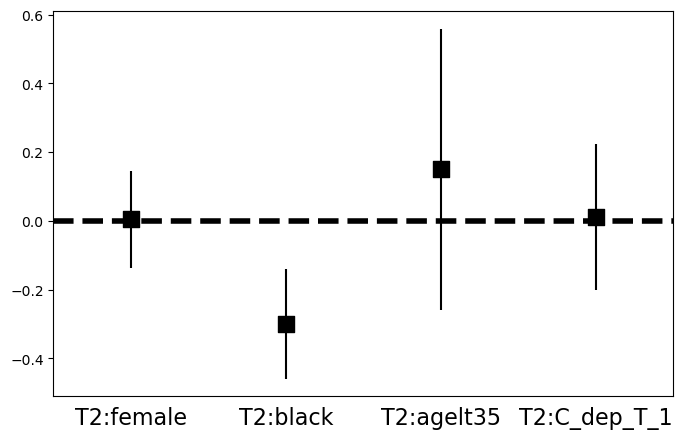

In [224]:
fig, ax = plt.subplots(figsize=(8, 5))
data1.plot(x='index', y='Coef.', kind='bar', 
             ax=ax, color='none', 
             yerr='0.975]', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(data1.shape[0]), 
           marker='s', s=120, 
           y=data1['Coef.'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2:female', 'T2:black', 'T2:agelt35', 'T2:C_dep_T_1'], 
                       rotation=0, fontsize=16)
plt.show()